# Python implementation of Killeen's replication probabilities

- $p_{rep}$ is the probability of a replication sample obtaining an effect of the same sign (no sign error).

- $ps_{rep}$ is the probability of obtaining a significant result in a replication sample at a given significance level (alpha, e.g., alpha = 0.05 yields significance at p < 0.05). 

In [41]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Functions
def r2t(r, n):
    return (r * np.sqrt(n - 2)) / np.sqrt(1 - r ** 2)

def p_rep(t_stat, df):
    return t.cdf(np.abs(t_stat) / np.sqrt(2), df)

def ps_rep(t_stat, df, alpha):
    term1 = np.abs(t_stat) / np.sqrt(2)
    term2 = t.ppf(1 - alpha / 2, df) / np.sqrt(2)
    return t.cdf(term1 - term2, df)

def r2psrep(r, n):
    return ps_rep(r2t(r, n), n - 2, 0.05)

/var/folders/69/9f3dwqj10pg8d4jmjfkrvpww0000gn/T/ipykernel_2135/713864236.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (r * np.sqrt(n - 2)) / np.sqrt(1 - r ** 2)


Minimum sample size for 80% power (r2 = 0.01): 987
Minimum sample size for 80% power (r2 = 0.02): 491


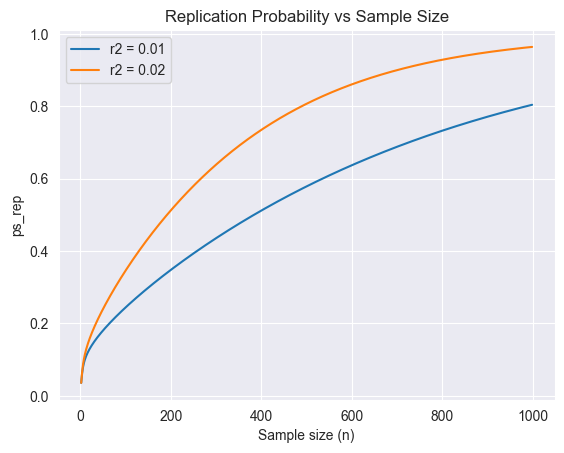

In [40]:
# Initial values
r2 = 0.01
n = 1000

# Calculate t_obs and ps_rep for initial values
tobs = r2t(np.sqrt(r2), n)
ps_rep_val = ps_rep(tobs, n - 2, 0.05)

# Calculate ps_rep values for different sample sizes
psrep_vals = [r2psrep(np.sqrt(r2), i) for i in range(1, 1001)]

# Plot the results
plt.figure()
plt.plot(psrep_vals, label='r2 = 0.01')
plt.xlabel('Sample size (n)')
plt.ylabel('ps_rep')
plt.title('Replication Probability vs Sample Size')

# Minimum sample size for 80% power
n_vals = np.where(np.array(psrep_vals) > 0.8)[0]
n_min_80_power = n_vals[0] + 1 if n_vals.size > 0 else None

# Print the minimum sample size for 80% power
print(f'Minimum sample size for 80% power (r2 = 0.01): {n_min_80_power}')

# Repeat for r2 = 0.02
r2 = 0.02
psrep_vals_02 = [r2psrep(np.sqrt(r2), i) for i in range(1, 1001)]

# Plot the results
plt.plot(psrep_vals_02, label='r2 = 0.02')

# Minimum sample size for 80% power
n_vals_02 = np.where(np.array(psrep_vals_02) > 0.8)[0]
n_min_80_power_02 = n_vals_02[0] + 1 if n_vals_02.size > 0 else None

# Print the minimum sample size for 80% power
print(f'Minimum sample size for 80% power (r2 = 0.02): {n_min_80_power_02}')

# Show plot with legend
plt.legend()
plt.show()